In [34]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.providers.aer import Aer
from qiskit.visualization import plot_bloch_multivector

$$
\begin{equation}\nonumber
        \begin{gathered}
          |\psi\rangle = \cos\left(\frac{\pi}{4}\right)|0\rangle+e^{i0}\sin\left(\frac{\pi}{4}\right)|1\rangle \\[0.5em]
          \Rightarrow |\psi\rangle = |+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)
          = \frac{1}{\sqrt{2}}\begin{bmatrix}1 \\ 1\end{bmatrix}
         \end{gathered} 
      \end{equation}
$$

In [35]:
qc = QuantumCircuit(1,1)
# Initialization of the state
init_state = [1/np.sqrt(2), 1/np.sqrt(2)]

qc.initialize(init_state, 0)

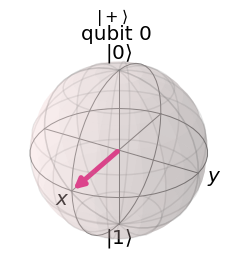

In [36]:
# Show the init state on the blochsphere
sim = Aer.get_backend("aer_simulator")

qc.save_statevector()
statevector_init = sim.run(qc).result().get_statevector()

plot_bloch_multivector(statevector_init, "$|+\\rangle$")

In [37]:
qc.measure(0, 0)

# Run the circuit
t_circuit = transpile(qc, sim)
qobj = assemble(t_circuit, shots=1024)
results = sim.run(qobj).result()
answer = results.get_counts()

answer

{'0': 531, '1': 493}

### The $|+\rangle$ state can also be created with a hadamard-gate
$$
H|0\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} =
\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

In [42]:
init_state = [1, 0]   # |0>

qc = QuantumCircuit(1)
qc.initialize(init_state, 0)
qc.h(0)

qc.draw()

┌─────────────────┐┌───┐
q: ┤ Initialize(1,0) ├┤ H ├
   └─────────────────┘└───┘

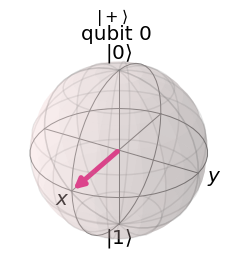

In [43]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector, "$|+\\rangle$")